In [1]:
# This information helps with debugging and getting support :)
import sys, platform
import pandas as pd
import bifacial_radiance as br
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)

Working on a  Windows 10
Python version  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version  1.5.3
bifacial_radiance version  0.4.4.dev373+g013fa7c.d20240911


In [2]:
import os
from pathlib import Path
import pandas as pd

testfolder = 'TEMP'

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

Your simulation will be stored in TEMP


In [3]:
demo = br.RadianceObj('tutorial_1',str(testfolder))  
epwfile = demo.getEPW(lat = 37.5, lon = -77.6)  # This location corresponds to Richmond, VA.

path = TEMP
Making path: images
Making path: objects
Making path: results
Making path: skies
Making path: EPWs
Making path: materials
Getting weather file: USA_VA_Richmond.724010_TMY2.epw
 ... OK!


In [4]:
!rtrace

rtrace: fatal - missing octree argument


In [12]:
!epw2wea .\EPWs\USA_VA_Richmond.724010_TMY2.epw .\EPWs\USA_VA_Richmond.724010_TMY2.wea

place RICHMOND_USA
latitude 37.50
longitude 77.33
time_zone 75.00
site_elevation 50.0
weather_data_file_units 1


In [7]:
metdata = demo.readWeatherFile(epwfile, coerce_year=2001) 

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


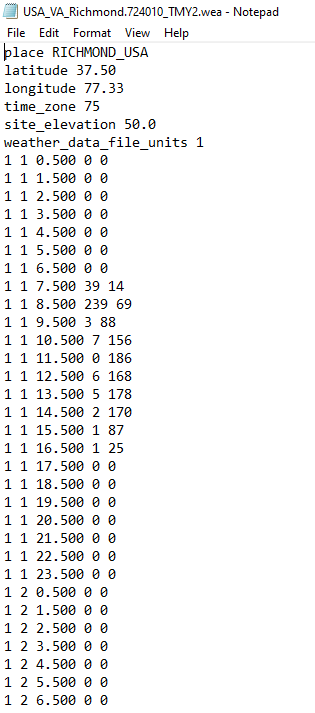

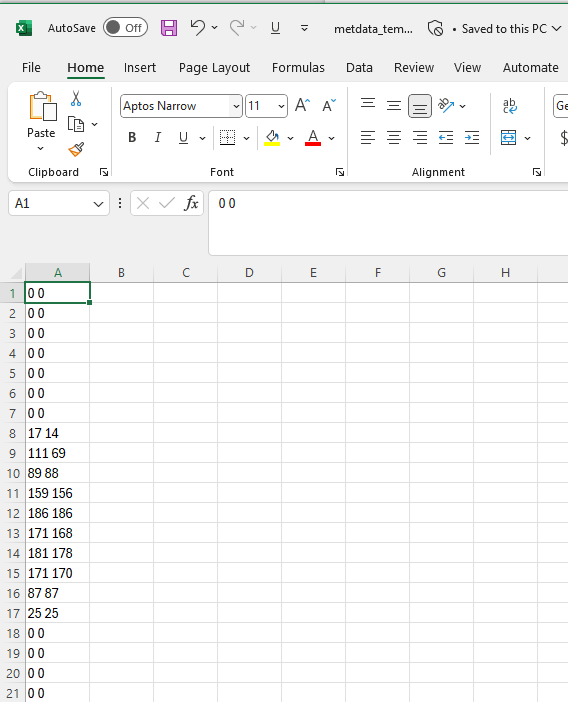

In [13]:
demo.setGround(0.2)
demo.genCumSky() # entire year.

Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Loaded  EPWs\metdata_temp.csv
message: Error!  Solar altitude is -7 < -6 degrees and Idh = 13 > 10 W/m^2 on day 76 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 11 > 10 W/m^2 on day 78 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -6 < -6 degrees and Idh = 14 > 10 W/m^2 on day 81 !Ibn is 0.  Attempting to continue!
There were 4537 sun up hours in this climate file
Total Ibh/Lbh: 0.000000


'skies\\cumulative.rad'

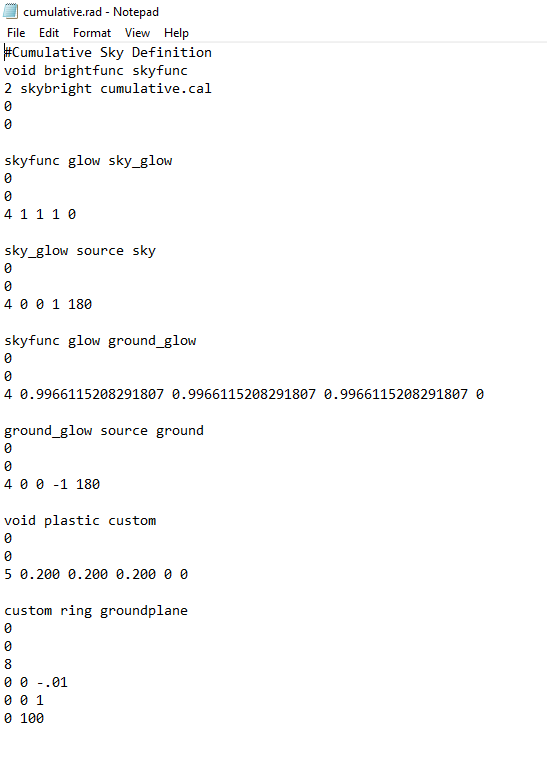


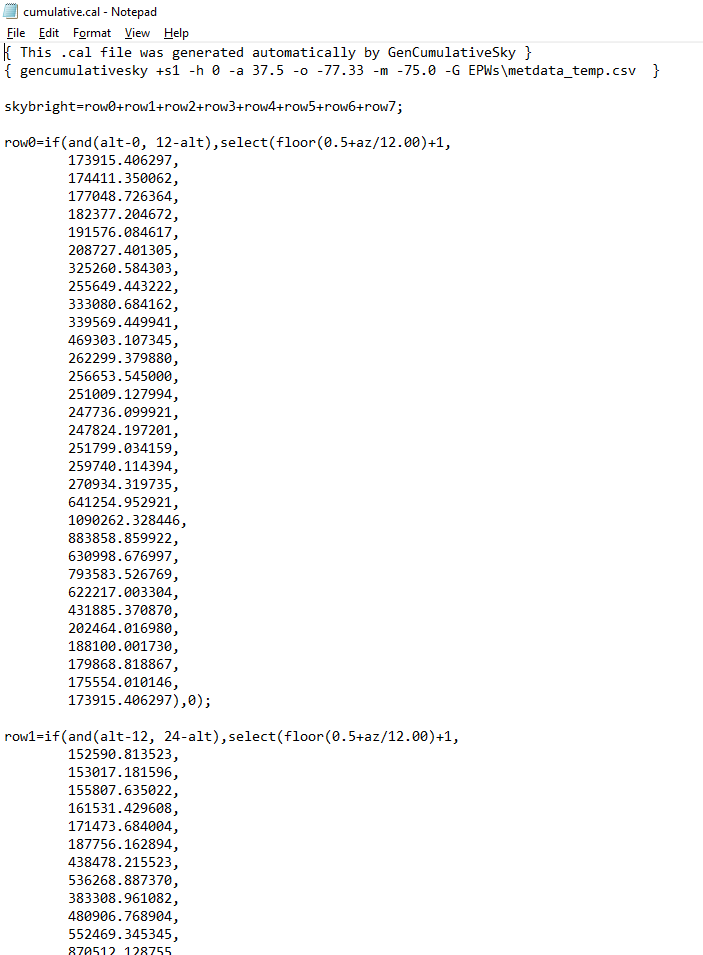

In [15]:
!gendaymtx -m 1 -A .\EPWs\USA_VA_Richmond.724010_TMY2.wea > .\EPWs\visible_results.mtx

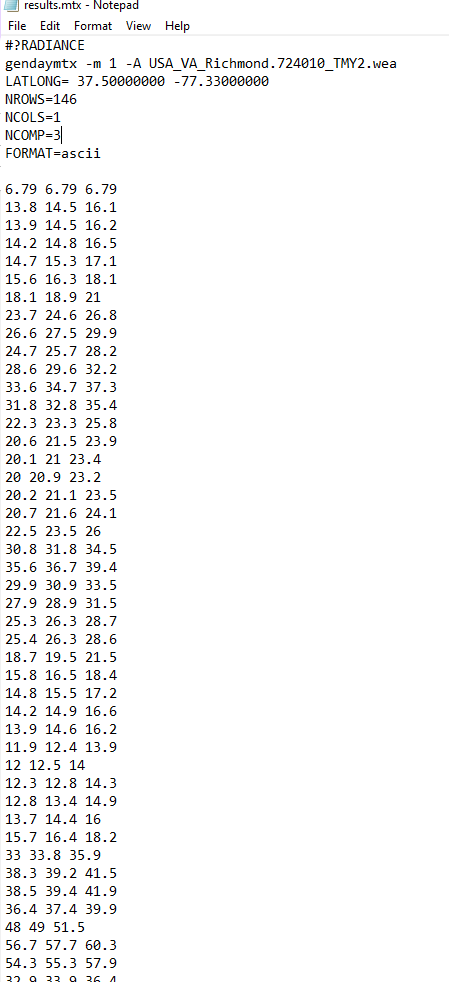

### other tests of gendaymtx

In [16]:
# total irradiance, not just visible
!gendaymtx -m 1 -A -O1 .\EPWs\USA_VA_Richmond.724010_TMY2.wea > .\EPWs\totalirrad_results.mtx

In [17]:
# More patches
!gendaymtx -m 2 -A -O1 .\EPWs\USA_VA_Richmond.724010_TMY2.wea > .\EPWs\totalirrad_results_m2.mtx

In [18]:
!gendaymtx -m 1 .\EPWs\USA_VA_Richmond.724010_TMY2.wea > .\EPWs\I_think_hourly_results.mtx

Perhaps we can compare results from gendaylit to this?

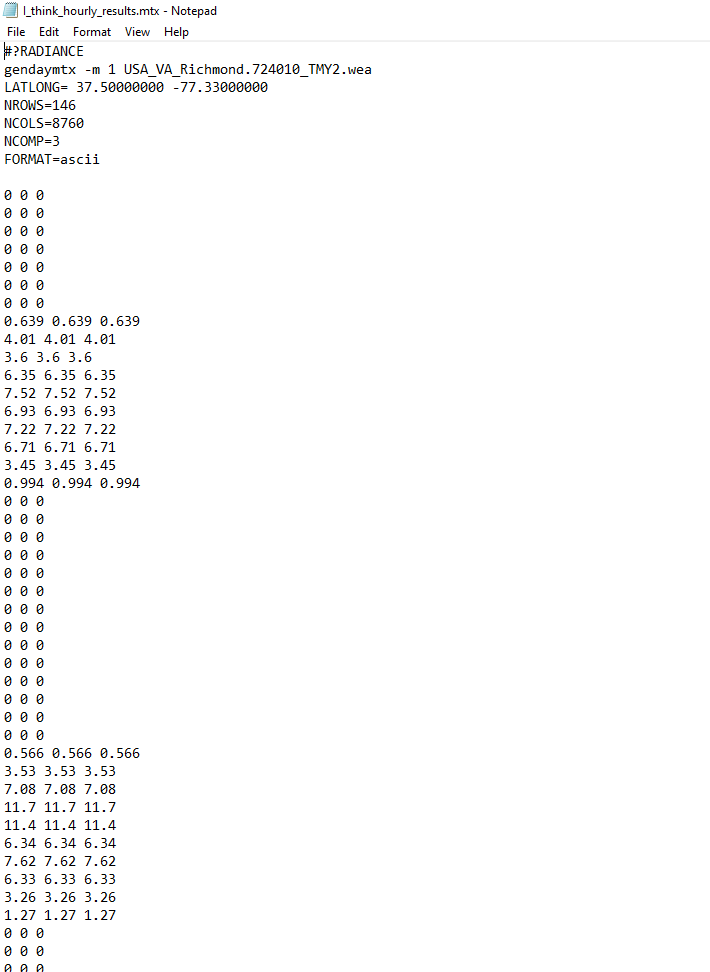

### Testing grabing the mtx instead of the .cal

In [19]:
module_type = 'test-module' 
module = demo.makeModule(name=module_type,x=2, y=1)
print(module)



Module Name: test-module
Module test-module updated in module.json
<class 'bifacial_radiance.module.ModuleObj'> : {'x': 2, 'y': 1, 'z': 0.02, 'modulematerial': 'black', 'scenex': 2.01, 'sceney': 1.0, 'scenez': 0.1, 'numpanels': 1, 'bifi': 1, 'text': '! genbox black test-module 2 1 0.02 | xform -t -1.0 -0.5 0 -a 1 -t 0 1.0 0', 'modulefile': 'objects\\test-module.rad', 'glass': False, 'offsetfromaxis': 0, 'xgap': 0.01, 'ygap': 0.0, 'zgap': 0.1}


In [20]:

sceneDict = {'tilt':10,'pitch':3,'clearance_height':0.2,'azimuth':180, 'nMods': 20, 'nRows': 7} 

scene = demo.makeScene(module,sceneDict)


In [31]:
filelist = demo.getfilelist()
filelist

['materials\\ground.rad',
 'skies\\cumulative.rad',
 'objects\\test-module_C_0.20_rtr_3.00_tilt_10_20modsx7rows_origin0,0.rad']

In [26]:
newfilelist = ['materials\\ground.rad',
 'EPWs\\totalirrad_results.mtx',
 'objects\\test-module_C_0.20_rtr_3.00_tilt_10_20modsx7rows_origin0,0.rad']

In [23]:
newfilelist2 = ['materials\\ground.rad',
 'skies\\cumulative_gendaymtx.rad',
 'objects\\test-module_C_0.20_rtr_3.00_tilt_10_20modsx7rows_origin0,0.rad']

In [28]:
octfile = demo.makeOct(demo.getfilelist())  


Created tutorial_1.oct


In [33]:
# not working...
octfile2 = demo.makeOct(newfilelist, octname='tutorial_1_v2.oct')  


Created tutorial_1_v2.oct.oct


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2210: Warning: oconv: fatal - (EPWs\totalirrad_results.mtx): undefined modifier "gendaymtx"
  warnings.warn(err[9:], Warning)


In [38]:
analysis = br.AnalysisObj(octfile, demo.basename)


In [39]:
frontscan, backscan = analysis.moduleAnalysis(scene)


In [40]:
results = analysis.analysis(octfile, demo.basename, frontscan, backscan)  


Linescan in process: tutorial_1_Row4_Module10_Front
message: rtrace: ./totalirrad_results.mtx, line 1:
rtrace: #?RADIANCE
rtrace: ^ illegal variable name
Linescan in process: tutorial_1_Row4_Module10_Back
message: rtrace: ./totalirrad_results.mtx, line 1:
rtrace: #?RADIANCE
rtrace: ^ illegal variable name


In [ ]:
load.read1Result('results\irr_tutorial_1.csv')


In [ ]:
https://unmethours.com/question/17628/understanding-radiance-the-relationship-between-sky-conditions-and-irradiance/
https://www.radiance-online.org/pipermail/radiance-general/2003-October/001059.html


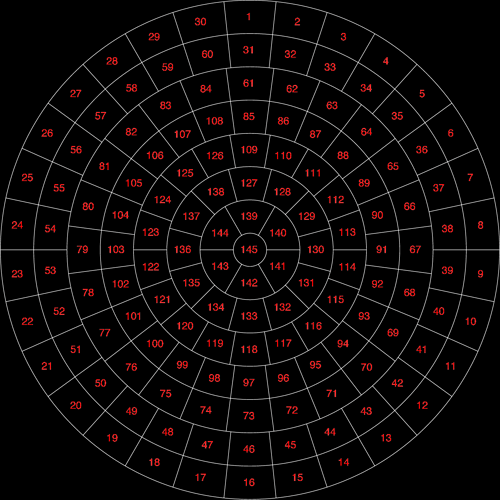